In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Load Data

In [2]:
train = pd.read_csv("twitter_train.csv")
# test = pd.read_csv("twitter_test.csv") # no label, so split train into train and valid set
# print(train.shape) # 31962 x 3
train.head() # label: 1 = racist/sexist; 0 = not racist/sexist

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# sample tweets from both labels
np.random.seed(22)
idx0 = np.where(train['label'] == 0)
idx1 = np.where(train['label'] == 1)
train['tweet'][np.random.choice(idx0[0],10)]

11966    flaxseed gel/shampoo results!  #peace #love #o...
24368     @user great end to a great day! happy weekend...
31695    @user given what we now know, how the church s...
26812             happy day!  #altwaystoheal  #healthy    
23501    18 km in the rain along the thames. perfect st...
24759    #zaynmalik   bull up: you will dominate your b...
22545                  @user true dat ... thanks !   @user
17153    #fruit #tea #peach #drink #yummy   #dayoff #li...
29593     @user @user well here i am...just waiting...a...
20324    okay i think i've got my @user and @user chann...
Name: tweet, dtype: object

In [4]:
train['tweet'][np.random.choice(idx1[0],10)]

14082    are you #black &amp; feel like the  are â¦on ...
24026    @user after 8 yrs of endless lies, contempt fr...
22285    thought factory: left-right polarisation! #tru...
10852    @user #allahsoil not all muslims hate america....
14530    trump is a cuck  @user #nazi #swastika #ebay! ...
16054    @user comment on @user reveals once more the d...
13425    sign that i checked a bag at iah. every. singl...
19095    @user i hate you with all of my being. #corrup...
16656    it's time to end  now. "days of our lives (liv...
9685     b4 sm we didnt hear this latent  every single ...
Name: tweet, dtype: object

## Format Data

In [5]:
stopwords = STOPWORDS
stopwords.update(["’", "“", "”", 'ªð', 'ºï', '¼ð', 'ó¾', "000", "000 000", "amp", 'urð', "https", "co", "user",'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'])


In [6]:
vec=CountVectorizer(stop_words=stopwords, min_df = 2)
vectors = vec.fit_transform(train["tweet"]) # create tf idf from full train data
idx_to_word = np.array(vec.get_feature_names())

In [8]:
idx_to_word[np.asarray((np.sum(vectors, axis=0) >100))[0]]

array(['10', '2016', 'adapt', 'affirmation', 'alone', 'already',
       'altwaystoheal', 'always', 'amazing', 'america', 'angry',
       'another', 'around', 'attack', 'away', 'awesome', 'baby', 'back',
       'bad', 'beach', 'bear', 'beautiful', 'beauty', 'believe', 'best',
       'better', 'big', 'bihday', 'bing', 'black', 'blessed', 'blog',
       'body', 'bong', 'book', 'boy', 'buffalo', 'bull', 'business',
       'buy', 'call', 'cat', 'change', 'check', 'children', 'city',
       'climb', 'coffee', 'cold', 'come', 'coming', 'conference', 'cool',
       'country', 'couple', 'crazy', 'cute', 'dad', 'dads', 'dance',
       'day', 'days', 'dead', 'depression', 'direct', 'dog', 'dominate',
       'done', 'dream', 'end', 'enjoy', 'enough', 'environment',
       'euro2016', 'even', 'every', 'everyone', 'everything', 'excited',
       'face', 'family', 'fashion', 'father', 'fathers', 'fathersday',
       'feel', 'feeling', 'finally', 'find', 'first', 'fitness', 'follow',
       'followme'

#### y to one-hot

In [11]:
def list2onehot(y, list_classes):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

In [12]:
# X = train['tweet'] # word form (31962 tweets,)
X = np.asarray(vectors.todense(), dtype = np.float32) # freq form (31962 tweets, 41104 word frequencies) 
y = train['label']
y_oh = list_to_onehot(y,[0, 1])
# y_test_oh = list_to_onehot(y_test,[0, 1])

NameError: name 'list_to_onehot' is not defined

### Split train and valid 

In [ ]:
X_train =[]
X_test = []
y_test = []
y_train = []
for i in np.arange(X.shape[0]):
    # for each example i, make it into train set with probabiliy 0.8 and into test set otherwise 
    U = np.random.rand() # Uniform([0,1]) variable
    if U < 0.8:
        # X_train = np.concatenate(X_train,X[i,:])
        X_train.append(X[i,:])
        y_train.append(y_oh[i,:].copy())
    else:
        # X_test = np.concatenate(X_test,X[i,:])
        X_test.append(X[i,:])
        y_test.append(y_oh[i,:].copy())
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
del train

### Wordcloud for each Label

In [14]:
# word cloud for different labels
def plot_wordcloud(Y, H, idx_to_word, categories):
        # plot the class-conditioanl PMF as wordclouds 
        # Y = (n x k), H = (p x n) (\Phi in lecture note), W = (p x k)
        # idx_to_word = list of words used in the vectorization of documents 
        # categories = list of class labels
        # prior on class labels = empirical PMF = [ # class i examples / total ]
        # class-conditional for class i = [ # word j in class i examples / # words in class i examples]
        
        class_conditional_PMF = []
        for i in np.arange(Y.shape[1]):
            idx = np.where(Y[:,i]==1)
            sub_H = H[:,idx[0]]
            word_count_per_class = np.sum(sub_H, axis=1)
            class_conditional_PMF.append(word_count_per_class/np.sum(word_count_per_class))
    
        ### topic mode
        num_words_to_sample = 10000
        
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), subplot_kw={'xticks': [], 'yticks': []})
        for ax, i in zip(axs.flat, np.arange(Y.shape[0])):
            dist = class_conditional_PMF[i]

            # sample (num_words_to_sample) proportionate to CC_PMF
            list_words = []
        
            for j in range(num_words_to_sample):
                idx = np.random.choice(np.arange(H.shape[0]), p=dist)
                list_words.append(idx_to_word[idx])
                
            Y = " ".join(list_words) # list to string
#             print(Y)
            stopwords = STOPWORDS
            stopwords.update(["’", "“", "”", "000", "000 000", "https", "co", "user"])
            wordcloud = WordCloud(background_color="black",
                                  relative_scaling=0.1,
                                  width=400,
                                  height=400).generate(Y)
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.set_xlabel(categories[i], fontsize='20')
            # ax.axis("off")

        plt.tight_layout()
        plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.08)
        plt.savefig('class_conditional_PMF_wordcloud_twitter.pdf', bbox_inches='tight')

In [15]:
categories = ['non-racist/sexist','racist/sexist']
plot_wordcloud(Y=np.asarray(y_train), H=X_train.T, idx_to_word=idx_to_word, categories=categories)

NameError: name 'y_train' is not defined

## Naive Bayes Classifier

In [ ]:
# subset from 23800 tweets (for memory reasons: 
# MemoryError: Unable to allocate 7.28 GiB for an array with shape (23759, 41104) and data type float64)
X_train_sm = []
y_train_sm = []
for i in np.arange(X_train.shape[0]):
    U = np.random.rand() # Uniform([0,1]) variable
    if U < 0.3:
        # X_train = np.concatenate(X_train,X[i,:])
        X_train_sm.append(X[i,:])
        y_train_sm.append(y_oh[i,:].copy())

In [ ]:
X_train_sm = np.array(X_train_sm)
y_train_sm = np.array(y_train_sm)
X_train_sm.shape

In [ ]:
def fit_NB(Y, H,pseudocount = 10**-5):
    '''
    Fit Multinomial Naive Bayes Calssifier
    Use the Maximum Likelihood prior and class conditional probabilities (in closed forms)
    Y = (n x k), H = (p x n) (\Phi in lecture note), W = (p x k)
    prior on class labels = empirical PMF = [ # class i examples / total ]
    class-conditional for class i = [ # word j in class i examples / # words in class i examples]
    Output = prior (k, ), class_conditional_PMF = (k, p)
    '''
    k = Y.shape[1] # number of classes (2)

    prior = np.sum(Y, axis=0)/np.sum(np.sum(Y, axis=0))
#     print(prior)

    class_conditional_PMF = []
    for i in np.arange(Y.shape[1]):
        idx = np.where(Y[:,i]==1) # select indices with class 0 or 1
        sub_H = H[:,idx[0]] + pseudocount # add psuedocount
        word_count_per_class = np.sum(sub_H, axis=1)
        class_conditional_PMF.append(word_count_per_class/np.sum(word_count_per_class))

    return prior, np.asarray(class_conditional_PMF)

#test 
prior, class_conditional_PMF = fit_NB(Y=y_train_sm, H=X_train_sm.T)
print(prior)
print(class_conditional_PMF)

In [ ]:
class_conditional_PMF.shape
X_train_sm.shape

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 5])
for i in [0,1]:
    ax.plot(np.arange(X_train_sm.shape[1]), class_conditional_PMF[i], label=categories[i])
ax.legend(fontsize='15')
plt.suptitle("Class conditional PMFs", fontsize='15')
plt.savefig('class_conditional_PMF_dist_twitter.pdf', bbox_inches='tight')

In [ ]:
def predict_MNB(X_test, prior, class_conditional_PMF):
    '''
    Compute predicted PMF for the test data given prior and class_conditional_PMF
    Simple use of Bayes' Theorem 
    X_test = (p x n) (words x docs)
    '''
    print(X_test.shape)
    print(class_conditional_PMF.shape)
    
    P = class_conditional_PMF / np.min(class_conditional_PMF) # normalize so that log(P) is not too small 
    Q = np.exp(X_test @ np.log(P).T)
    Q = Q * np.repeat(prior[:, np.newaxis], repeats=Q.shape[0], axis=1).T
    sum_of_rows = Q.sum(axis=1)
    
    return Q / sum_of_rows[:, np.newaxis]

# test 
predictive_PMF = predict_MNB(X_test, prior, class_conditional_PMF)
plt.plot(predictive_PMF[4])

In [32]:
def compute_accuracy_metrics(Y_test, P_pred, use_opt_threshold=False, verbose=True):
    
    # y_test = binary label 
    # P_pred = predicted probability for y_test
    # compuate various binary classification accuracy metrics
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_pred, pos_label=None)
    mythre = thresholds[np.argmax(tpr - fpr)]
    myauc = metrics.auc(fpr, tpr)
    # print('!!! auc', myauc)
    
    # Compute classification statistics
    threshold = 0.5
    if use_opt_threshold:
        threshold = mythre
    
    Y_pred = P_pred.copy()
    Y_pred[Y_pred < threshold] = 0
    Y_pred[Y_pred >= threshold] = 1

    mcm = confusion_matrix(Y_test, Y_pred)
    
    tn = mcm[0, 0]
    tp = mcm[1, 1]
    fn = mcm[1, 0]
    fp = mcm[0, 1]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tn / (tn + fp)
    specificity = tp / (tp + fn)
    precision = tp / (tp + fp)
    fall_out = fp / (fp + tn)
    miss_rate = fn / (fn + tp)

    # Save results
    results_dict = {}
    results_dict.update({'Y_test': Y_test})
    results_dict.update({'Y_pred': Y_pred})
    results_dict.update({'AUC': myauc})
    results_dict.update({'Opt_threshold': mythre})
    results_dict.update({'Accuracy': accuracy})
    results_dict.update({'Sensitivity': sensitivity})
    results_dict.update({'Specificity': specificity})
    results_dict.update({'Precision': precision})
    results_dict.update({'Fall_out': fall_out})
    results_dict.update({'Miss_rate': miss_rate})
    results_dict.update({'Confusion_mx': mcm})
    
    
    if verbose:
        for key in [key for key in results_dict.keys()]:
            if key not in ['Y_test', 'Y_pred', 'Confusion_mx']:
                print('% s ===> %.3f' % (key, results_dict.get(key)))
        print('Confusion matrix \n ===>\n', mcm)
            
    return results_dict

In [ ]:
results_dict = compute_accuracy_metrics(Y_test=onehot_to_list(y_test), P_pred=predictive_PMF[:,1], verbose=True)

# LR

In [17]:
# def fit_LR_GD(Y, H, W0=None, sub_iter=100, stopping_diff=0.01):
#         '''
#         Convex optimization algorithm for Logistic Regression using Gradient Descent 
#         Y = (n x 1), H = (p x n) (\Phi in lecture note), W = (p x 1)
#         Logistic Regression: Y ~ Bernoulli(Q), Q = sigmoid(H.T @ W)
#         MLE -->
#         Find \hat{W} = argmin_W ( sum_j ( log(1+exp(H_j.T @ W) ) - Y.T @ H.T @ W ) )
#         '''
#         if W0 is None:
#             W0 = np.random.rand(H.shape[0],1) #If initial coefficients W0 is None, randomly initialize  
            
        
        
#         W1 = W0.copy()
#         i = 0
#         grad = np.ones(W0.shape)
#         while (i < sub_iter) and (np.linalg.norm(grad) > stopping_diff):
#             Q = 1/(1+np.exp(-H.T @ W1))  # probability matrix, same shape as Y
#             # grad = H @ (Q - Y).T + alpha * np.ones(W0.shape[1])
#             grad = H @ (Q - Y)
#             W1 = W1 - (np.log(i+1) / (((i + 1) ** (0.5)))) * grad
#             i = i + 1
#             # print('iter %i, grad_norm %f' %(i, np.linalg.norm(grad)))
#         return W1

# H_train = np.vstack((np.ones(X_train.shape[0]), X_train.T))  # add first row of 1's for bias features 

#W = fit_LR_GD(Y=y_train, H=H_train) 

# H_test = np.vstack((np.ones(X_test.shape[0]), X_test.T))


# Q = 1 / (1 + np.exp(-H_test.T @ W))

# compute_accuracy_metrics(Y_test=np.argmax(y_test,axis=1), P_pred = np.argmax(Q,axis=1))

In [247]:
LR = LogisticRegression()
LR.fit(X_train, np.argmax(y_train,axis=1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
LRpreds = LR.predict(X_test)

In [249]:
compute_accuracy_metrics(Y_test=np.argmax(y_test,axis=1), P_pred = LRpreds)

AUC ===> 0.749
Opt_threshold ===> 1.000
Accuracy ===> 0.959
Sensitivity ===> 0.995
Specificity ===> 0.503
Precision ===> 0.882
Fall_out ===> 0.005
Miss_rate ===> 0.497
Confusion matrix 
 ===>
 [[5914   31]
 [ 229  232]]


{'AUC': 0.7490196650788409,
 'Accuracy': 0.9594130502653762,
 'Confusion_mx': array([[5914,   31],
        [ 229,  232]], dtype=int64),
 'Fall_out': 0.005214465937762826,
 'Miss_rate': 0.4967462039045553,
 'Opt_threshold': 1,
 'Precision': 0.8821292775665399,
 'Sensitivity': 0.9947855340622371,
 'Specificity': 0.5032537960954447,
 'Y_pred': array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 'Y_test': array([0, 0, 0, ..., 0, 1, 0], dtype=int64)}

In [166]:
def fit_LR(vectorizer=CountVectorizer, min_df = 0, train_size=0.8, penalty = 'l2', solver = 'lbfgs'):
    vec=vectorizer(stop_words=stopwords, min_df =min_df)
    vectors = vec.fit_transform(train["tweet"])
    idx_to_word = np.array(vec.get_feature_names())
    X = np.asarray(vectors.todense(), dtype = np.float32)  
    y = train['label']
    X_train, X_test, y_train,y_test = train_test_split(X, y,train_size = train_size, random_state = 1)
    LR = LogisticRegression(penalty = penalty, solver = solver)
    LR.fit(X_train,y_train)
    LRpreds = LR.predict(X_test)
    accuracy = compute_accuracy_metrics(Y_test=y_test, P_pred = LRpreds)
    coefs = np.ravel(LR.coef_)
    top_ten_thresh = np.sort(coefs, )[-11]
    bottom_ten_thresh = np.sort(coefs, )[10]
    top_df = pd.DataFrame({'words': idx_to_word[coefs > top_ten_thresh], 'coefs': coefs[coefs > top_ten_thresh]})
    top_df = top_df.sort_values(by=['coefs'], ascending = False, ignore_index=True)
    bottom_df = pd.DataFrame({'words': idx_to_word[coefs < bottom_ten_thresh], 'coefs': coefs[coefs < bottom_ten_thresh]})
    bottom_df = bottom_df.sort_values(by=['coefs'], ascending = True, ignore_index=True)
    return {'Accuracy': accuracy.get('Accuracy'), 'top': top_df, 'bottom': bottom_df, 'n_cols': X_train.shape[1]}


In [168]:
accuracies = []
for i in range(1,11): 
    accuracies.append(fit_LR(min_df = i, train_size = 0.5).get('Accuracy'))
    sizes.append(i)

AUC ===> 0.712
Opt_threshold ===> 1.000
Accuracy ===> 0.956
Sensitivity ===> 0.994
Specificity ===> 0.429
Precision ===> 0.840
Fall_out ===> 0.006
Miss_rate ===> 0.571
Confusion matrix 
 ===>
 [[14804    89]
 [  621   467]]
AUC ===> 0.708
Opt_threshold ===> 1.000
Accuracy ===> 0.955
Sensitivity ===> 0.994
Specificity ===> 0.423
Precision ===> 0.835
Fall_out ===> 0.006
Miss_rate ===> 0.577
Confusion matrix 
 ===>
 [[14802    91]
 [  628   460]]


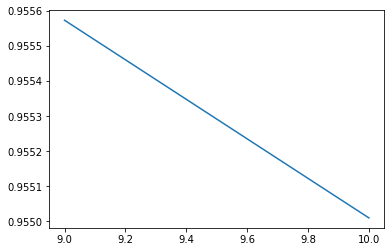

In [170]:
plt.plot(range(1,11),accuracies)

In [141]:
n_columns = []
for i in range(1,11):
    n_columns.append(fit_LR(min_df = i, train_size = 0.3).get('n_cols'))

(9588, 41230)
(9588, 41230)
(9588, 15272)
(9588, 9848)
(9588, 7540)
(9588, 6123)
(9588, 5197)
(9588, 4537)
(9588, 4026)
(9588, 3645)
(9588, 3356)


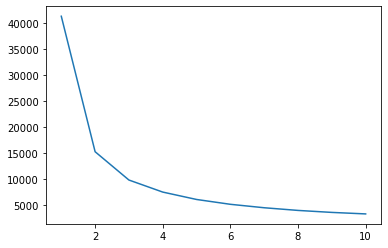

In [144]:
plt.plot(range(1,11),n_columns)

In [ ]:
accuracies = []
sizes = []
for i in np.arange(0.1,1,0.1):
    accuracies.append(fit_LR(min_df = 2, train_size = i))
    sizes.append(i)

In [ ]:
plt.plot(sizes, accuracies)

In [ ]:
fit_LR(min_df = 2, train_size = 0.8, vectorizer=TfidfVectorizer)
fit_LR(min_df = 2, train_size = 0.8, vectorizer=CountVectorizer)

In [162]:
top_df = fit_LR(min_df = 2, train_size = 0.8, vectorizer=CountVectorizer).get('top')
bottom_df = fit_LR(min_df = 2, train_size = 0.8, vectorizer=CountVectorizer).get('bottom')

AUC ===> 0.745
Opt_threshold ===> 1.000
Accuracy ===> 0.960
Sensitivity ===> 0.993
Specificity ===> 0.497
Precision ===> 0.846
Fall_out ===> 0.007
Miss_rate ===> 0.503
Confusion matrix 
 ===>
 [[5921   39]
 [ 218  215]]


In [163]:
top_df

,words,coefs
0,allahsoil,4.485203
1,racism,3.130266
2,bigot,2.908237
3,white,2.641452
4,racist,2.620348
5,blacklivesmatter,2.483757
6,maga,2.468139
7,2017,2.331907
8,latest,2.322576
9,equality,2.276078


In [164]:
bottom_df

,words,coefs
0,bihday,-2.213675
1,orlando,-1.813595
2,day,-1.806850
3,smile,-1.701322
4,hardcore,-1.643043
5,healthy,-1.599646
6,tomorrow,-1.598249
7,friday,-1.553784
8,life,-1.500524
9,weekend,-1.433967
